In [61]:
import pandas as pd
import scanpy as sc
import scvelo as scv
import numpy as np
import collections

In [92]:
phenoDat = pd.read_csv('sccTreat.csv')
phenoDat.head()

,cellTreatment,file,cell,treatment
0,SCC1CTX,S1_L002,SCC1,CTX
1,SCC1CTX,S1_L002,SCC1,CTX
2,SCC1CTX,S1_L003,SCC1,CTX
3,SCC1CTX,S1_L003,SCC1,CTX
4,SCC1CTX,S1_L003,SCC1,CTX


In [93]:
def removeReplicate(row):
    if row['treatment'] == 'CTXR' or row['treatment'] == 'CTX':
        return('CTX')
    elif row['treatment'] == 'PBSR' or row['treatment'] == 'PBS':
        return 'PBS'
phenoDat['treatment2']=phenoDat.apply(removeReplicate,axis=1)
set(phenoDat['treatment2'])

{'CTX', 'PBS'}

In [94]:
phenoDat[['treatment']],phenoDat[['treatment2']] = phenoDat[['treatment2']],phenoDat[['treatment']]
phenoDat.drop_duplicates(inplace=True)
set(phenoDat['treatment'])

{'CTX', 'PBS'}

In [95]:
# duplicate file
[x for x,v in collections.Counter(phenoDat['file']).items() if v > 1]

['S17_L007']

In [96]:
#this is causing the problem
phenoDat.loc[phenoDat['file'] == 'S17_L007',:]
#For now dropping scc6 for now


,cellTreatment,file,cell,treatment,treatment2
209,SCC25PBSR,S17_L007,SCC25,PBS,PBSR
341,SCC6PBSR,S17_L007,SCC6,PBS,PBSR


In [97]:
phenoDat.drop(labels=341,inplace=True)

In [99]:
adata = sc.read_h5ad('adataWithVelocity.h5ad')
adata

AnnData object with n_obs × n_vars = 223413 × 2000 
    obs: 'folder', 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_settings'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [100]:
df = adata.obs.set_index('folder').join(phenoDat.set_index('file'))
df.shape

(223413, 10)

In [101]:
adata.obs = df

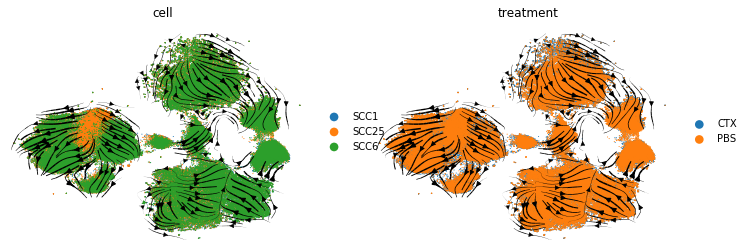

In [104]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color=['cell', 'treatment'],legend_loc = 'right margin',alpha=1)

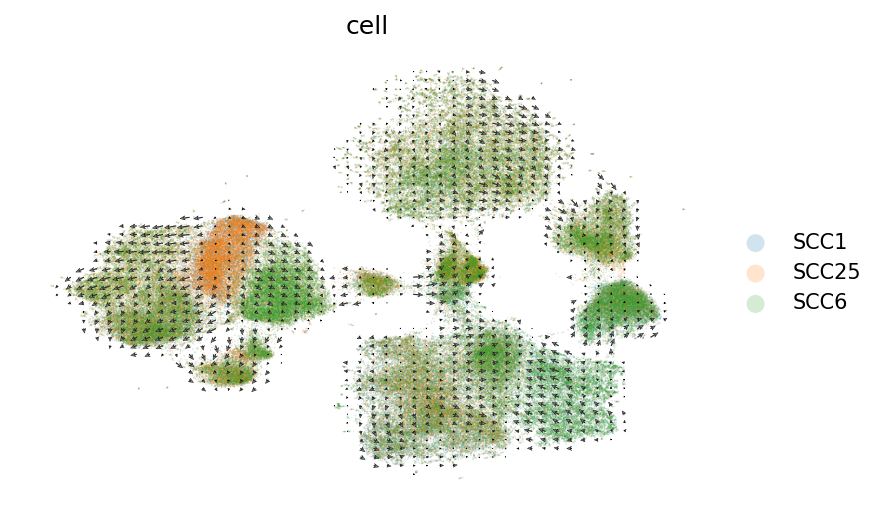

In [105]:
scv.pl.velocity_embedding_grid(adata, basis='umap', arrow_length=1.2, arrow_size=1.2, dpi=150, color = ['cell'],legend_loc='right margin' )

In [112]:
scv.tl.rank_velocity_genes(adata, match_with='treatment', resolution=.4)

computing velocity clusters
    finished (0:02:45) --> added 
    'velocity_clusters', clusters based on modularity on velocity field (adata.obs)
ranking velocity genes
    finished (0:00:26) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns)


In [113]:
adata

AnnData object with n_obs × n_vars = 223413 × 2000 
    obs: 'n_genes', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'cellTreatment', 'cell', 'treatment', 'treatment2', 'velocity_clusters'
    var: 'n_cells', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes', 'velocity_score'
    uns: 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_settings', 'cell_colors', 'treatment_colors', 'rank_velocity_genes'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'

In [114]:
pd.DataFrame(adata.uns['rank_velocity_genes']['names']).head()

,PBS 0,CTX 1,PBS 2,PBS 3,CTX 4,CTX 5,PBS 6,PBS 7,PBS 8,CTX 9,CTX 10,PBS 11,PBS 12
0,ENSG00000140945.17,ENSG00000115414.19,ENSG00000101384.12,ENSG00000198431.16,ENSG00000137693.14,ENSG00000124171.9,ENSG00000148120.16,ENSG00000248656.2,ENSG00000166710.20,ENSG00000173193.15,ENSG00000152558.15,ENSG00000140988.16,ENSG00000204262.14
1,ENSG00000101384.12,ENSG00000136603.14,ENSG00000085733.16,ENSG00000083857.14,ENSG00000124882.4,ENSG00000110330.8,ENSG00000140945.17,ENSG00000198431.16,ENSG00000135480.16,ENSG00000154556.18,ENSG00000187240.16,ENSG00000091140.14,ENSG00000142173.15
2,ENSG00000095303.17,ENSG00000130635.15,ENSG00000140945.17,ENSG00000125538.12,ENSG00000187240.16,ENSG00000137693.14,ENSG00000182463.16,ENSG00000133106.14,ENSG00000234745.11,ENSG00000198431.16,ENSG00000106366.8,ENSG00000181019.13,ENSG00000182463.16
3,ENSG00000185567.7,ENSG00000134871.19,ENSG00000185567.7,ENSG00000173193.15,ENSG00000152558.15,ENSG00000023445.14,ENSG00000157168.20,ENSG00000083857.14,ENSG00000176014.13,ENSG00000183486.13,ENSG00000140416.21,ENSG00000176014.13,ENSG00000140945.17
4,ENSG00000182463.16,ENSG00000154380.17,ENSG00000234745.11,ENSG00000154556.18,ENSG00000124171.9,ENSG00000121413.12,ENSG00000196754.12,ENSG00000188153.13,ENSG00000112308.13,ENSG00000133106.14,ENSG00000137693.14,ENSG00000171848.15,ENSG00000185567.7


In [115]:
adata.obs

,n_genes,initial_size_spliced,initial_size_unspliced,initial_size,n_counts,velocity_self_transition,cellTreatment,cell,treatment,treatment2,velocity_clusters
S13_L002,205,240.0,33.0,240.0,4801.742188,0.101422,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,890,1646.0,153.0,1646.0,4852.849609,0.127840,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,236,289.0,45.0,289.0,4809.086914,0.159400,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,947,2004.0,1771.0,2004.0,4166.091797,0.082434,SCC1CTXR,SCC1,CTX,CTXR,CTX 10
S13_L002,3851,18459.0,3578.0,18459.0,4710.476074,0.166140,SCC1CTXR,SCC1,CTX,CTXR,CTX 10
S13_L002,3350,12140.0,2780.0,12140.0,4761.440918,0.272643,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,266,360.0,45.0,360.0,4877.305664,0.272201,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,2134,4851.0,1943.0,4851.0,4534.087891,0.000000,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
S13_L002,201,240.0,26.0,240.0,4781.133789,0.344578,SCC1CTXR,SCC1,CTX,CTXR,CTX 10
S13_L002,208,238.0,34.0,238.0,4862.873535,0.153494,SCC1CTXR,SCC1,CTX,CTXR,CTX 5
